# Machine Learning Prediction of Oil, Gas and Water Production in the DSEAT Oil Field.

The dataset contains used in this prediction analysis contains  17 columns of data and 6925 of data entry for the training data and 17 columns of columns and 2075 data entry.

12 columns were transformed as features and 3 columns were used as the label columns which includes Oil Production (stb/day), Gas Volume (psi) and Water Production (stb/day).

### Training Data Exploration

In [1]:
# Importing libraries 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Parameter settings for seaborn
sns.set()
sns.set(style="darkgrid")
plt.rcParams['figure.figsize']=(10,10)


In [2]:
# Load the dataset
df_train = pd.read_csv('dseats_2024_training_dataset.csv')
#converting the date to datetime object
df_train['PRODUCTION DATE'] = pd.to_datetime(df_train['PRODUCTION DATE'], format='mixed')

df_train.head()

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,2014-07-04,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0
1,2014-08-04,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0
2,2014-09-04,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0
3,2014-10-04,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0
4,2014-11-04,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,4500.45403,370.02589,4020.53477,0.0,479.91926,33.07195,0.0,0.0,0.0


In [3]:
# adding a new column - Production year
df_train['Production Year'] = df_train['PRODUCTION DATE'].dt.year

df_train.head()

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day),Production Year
0,2014-07-04,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0,2014
1,2014-08-04,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0,2014
2,2014-09-04,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0,2014
3,2014-10-04,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0,2014
4,2014-11-04,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,4500.45403,370.02589,4020.53477,0.0,479.91926,33.07195,0.0,0.0,0.0,2014


### dataset Information

In [4]:
print(df_train.info())

#Getting the total number of null row
print(df_train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6925 entries, 0 to 6924
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   PRODUCTION DATE                6925 non-null   datetime64[ns]
 1   Field Name                     6925 non-null   object        
 2   WELL_BORE_CODE                 6925 non-null   object        
 3   N_WELL_BORE_CODE               6925 non-null   int64         
 4   WellBore Name                  6925 non-null   object        
 5   FLOW_KIND                      6925 non-null   object        
 6   WELL_TYPE                      6925 non-null   object        
 7   Downhole Pressure (PSI)        6925 non-null   float64       
 8   Downhole Temperature (Kelvin)  6925 non-null   float64       
 9   Average Tubing Pressure        6925 non-null   float64       
 10  Annulus Pressure (PSI)         6925 non-null   float64       
 11  AVG WHP (PSI)    

In [5]:
print('Training data shape:', df_train.shape)

Training data shape: (6925, 17)


In [6]:
# Training Data Statistics
df_train.describe()

,PRODUCTION DATE,N_WELL_BORE_CODE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day),Production Year
count,6925,6925.000000,6925.000000,6925.000000,6925.000000,6925.000000,6925.000000,6919.000000,6925.000000,6.925000e+03,6925.000000,6925.000000
mean,2012-07-06 09:43:54.108303360,107.297040,2587.482923,349.674794,2161.986343,180.369383,716.576882,21.864557,8494.774524,6.978690e+06,11480.559310,2012.024404
min,2008-01-03 00:00:00,105.000000,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-2879.813600,2008.000000
25%,2010-07-04 00:00:00,107.000000,0.000000,273.150000,896.612291,0.000000,476.539814,4.631982,1686.600600,1.434288e+06,80.323300,2010.000000
50%,2013-01-17 00:00:00,107.000000,3378.397358,376.911370,2472.031527,213.091127,619.647824,14.301660,5479.470600,4.770461e+06,5529.413200,2013.000000
75%,2014-07-15 00:00:00,108.000000,3664.905359,379.496193,2907.047474,300.356843,903.890487,31.529768,11730.472600,9.892230e+06,22261.505100,2014.000000
max,2015-12-06 00:00:00,109.000000,4606.666675,381.652178,4592.612695,435.287508,1991.009935,125.718570,37122.573600,3.004494e+07,50444.164600,2015.000000
std,NaN,0.980161,1588.474034,46.240823,1053.875029,139.771514,347.859953,22.300691,8927.596731,7.100875e+06,11484.481008,2.287246


In [7]:
df_train.columns

Index(['PRODUCTION DATE', 'Field Name', 'WELL_BORE_CODE', 'N_WELL_BORE_CODE',
       'WellBore Name', 'FLOW_KIND', 'WELL_TYPE', 'Downhole Pressure (PSI)',
       'Downhole Temperature (Kelvin)', 'Average Tubing Pressure',
       'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size',
       'Oil Production (stb/day)', 'Gas Volume (scf/day)',
       'Water Production (stb/day)', 'Production Year'],
      dtype='object')

### Data Cleaning

In [8]:
df_train.isnull().sum()

PRODUCTION DATE                  0
Field Name                       0
WELL_BORE_CODE                   0
N_WELL_BORE_CODE                 0
WellBore Name                    0
FLOW_KIND                        0
WELL_TYPE                        0
Downhole Pressure (PSI)          0
Downhole Temperature (Kelvin)    0
Average Tubing Pressure          0
Annulus Pressure (PSI)           0
AVG WHP (PSI)                    0
Choke Size                       6
Oil Production (stb/day)         0
Gas Volume (scf/day)             0
Water Production (stb/day)       0
Production Year                  0
dtype: int64

In [9]:
#fill the na value with the average of the column since its only Choke Size 
# column that has missing values
df_train['Choke Size'].fillna(df_train['Choke Size'].mean(), inplace=True)
print('The average value of the choke size is  {:.3f}'.
      format(df_train['Choke Size'].mean()))
df_train.isnull().sum()

The average value of the choke size is  21.865


PRODUCTION DATE                  0
Field Name                       0
WELL_BORE_CODE                   0
N_WELL_BORE_CODE                 0
WellBore Name                    0
FLOW_KIND                        0
WELL_TYPE                        0
Downhole Pressure (PSI)          0
Downhole Temperature (Kelvin)    0
Average Tubing Pressure          0
Annulus Pressure (PSI)           0
AVG WHP (PSI)                    0
Choke Size                       0
Oil Production (stb/day)         0
Gas Volume (scf/day)             0
Water Production (stb/day)       0
Production Year                  0
dtype: int64

### Data Exploration

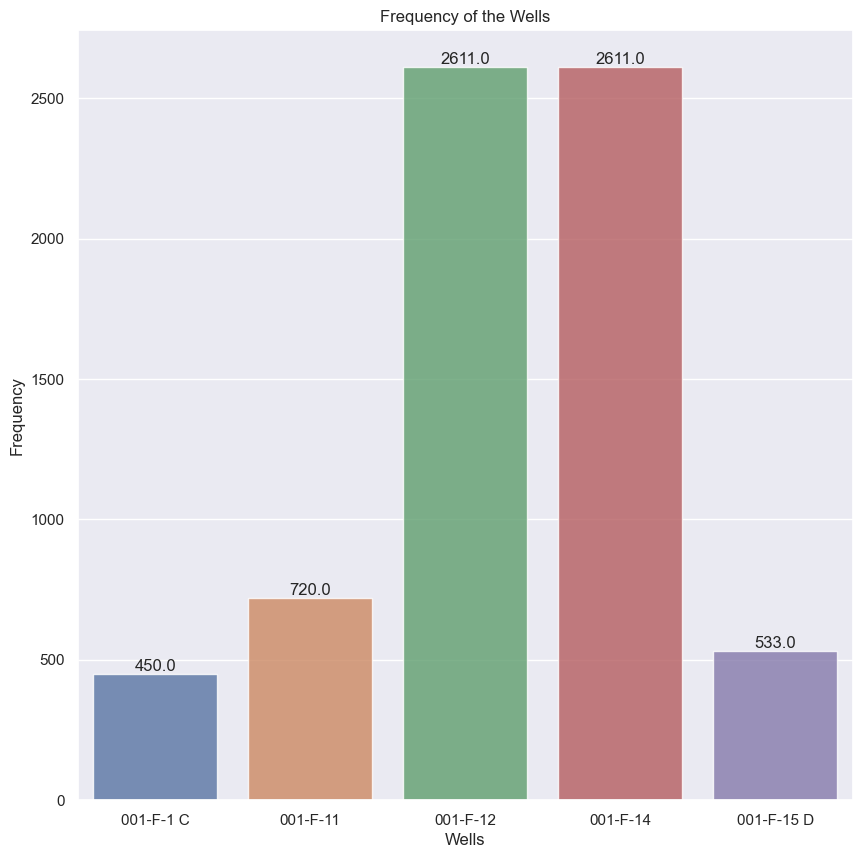

In [10]:

# plotting the frequency count

counts = (df_train['WellBore Name']).value_counts(sort=False)
barplot = sns.barplot(x=counts.index, y=counts.values, alpha=0.8)


# Display the values on the bars
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2, p.get_height(), 
             str(p.get_height()), ha='center', va='bottom')


# adding title and labels
plt.title('Frequency of the Wells')
plt.xlabel('Wells')
plt.ylabel('Frequency')

# show the plot
plt.show()


# The total oil, gas and water production 

In [11]:
print('Total oil production (stb/day):', df_train['Oil Production (stb/day)'].sum())
print('Total gas volume (scf/day):', df_train['Gas Volume (scf/day)'].sum())
print('Total water production (stb/day):', df_train['Water Production (stb/day)'].sum())

Total oil production (stb/day): 58826313.578999996
Total gas volume (scf/day): 48327425355.452
Total water production (stb/day): 79502873.2221


In [12]:
# The total oil, gas and water production for each well

total_prod_train = df_train[['Oil Production (stb/day)', 'Gas Volume (scf/day)',
                    'Water Production (stb/day)']].groupby(df_train['WellBore Name']).sum()

print('The total oil production for each well:')
total_prod_train

The total oil production for each well:


,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
WellBore Name,,,
001-F-1 C,9.034211e+05,7.475400e+08,6.256058e+05
001-F-11,4.877047e+06,4.113850e+09,1.266428e+06
001-F-12,2.800603e+07,2.287004e+10,3.996385e+07
001-F-14,2.444346e+07,2.009650e+10,3.763401e+07
001-F-15 D,5.963533e+05,4.995001e+08,1.297967e+04


In [13]:
unstacked = total_prod_train.unstack()
unstacked

                            WellBore Name
Oil Production (stb/day)    001-F-1 C        9.034211e+05
                            001-F-11         4.877047e+06
                            001-F-12         2.800603e+07
                            001-F-14         2.444346e+07
                            001-F-15 D       5.963533e+05
Gas Volume (scf/day)        001-F-1 C        7.475400e+08
                            001-F-11         4.113850e+09
                            001-F-12         2.287004e+10
                            001-F-14         2.009650e+10
                            001-F-15 D       4.995001e+08
Water Production (stb/day)  001-F-1 C        6.256058e+05
                            001-F-11         1.266428e+06
                            001-F-12         3.996385e+07
                            001-F-14         3.763401e+07
                            001-F-15 D       1.297967e+04
dtype: float64

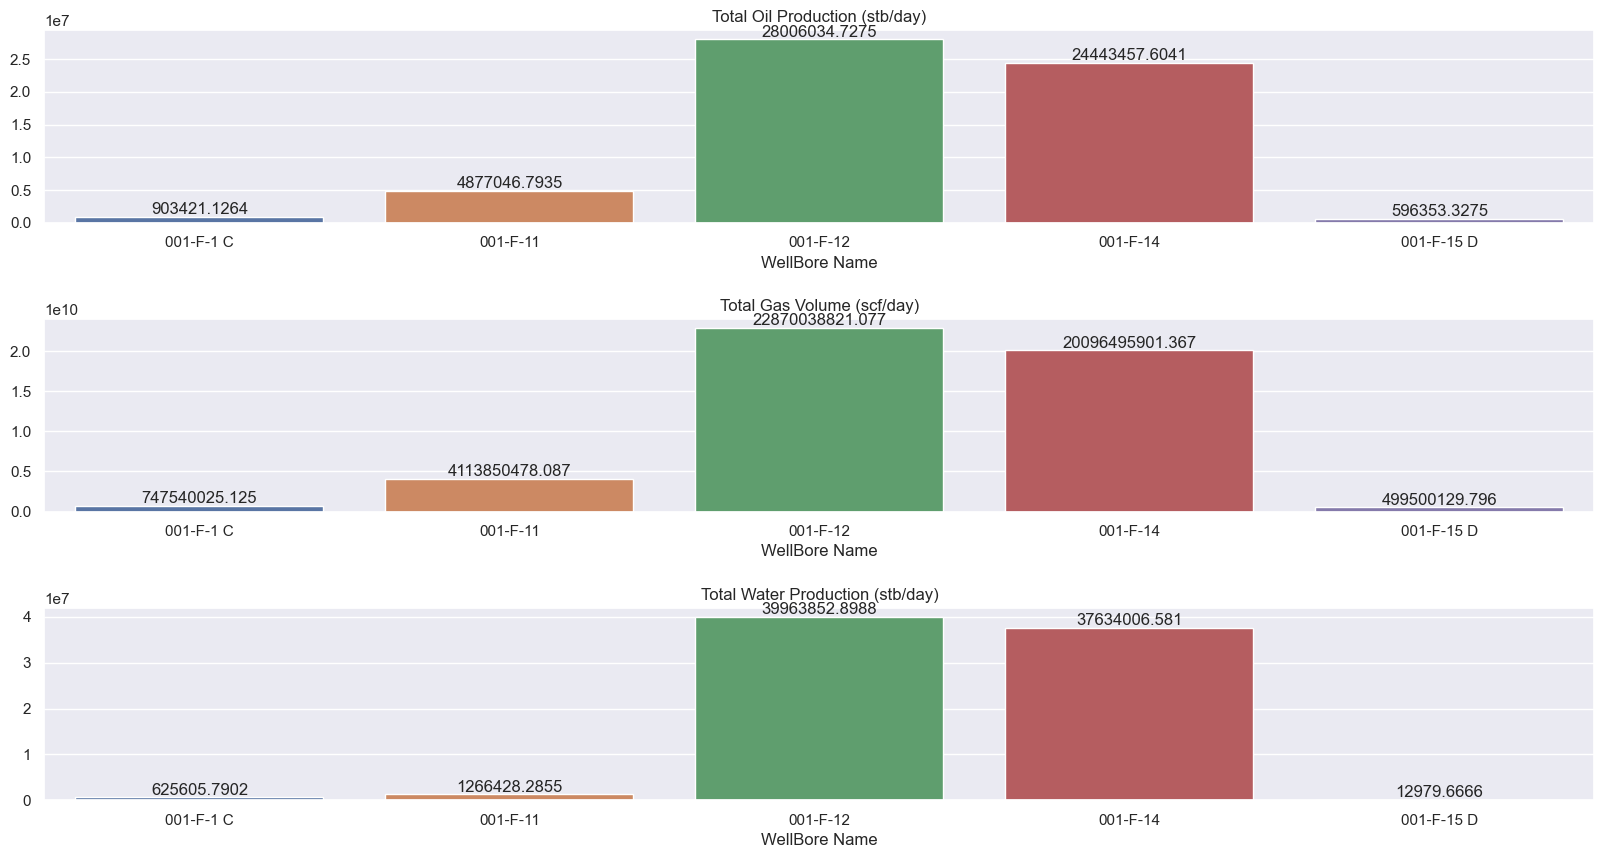

In [14]:
fig, axes = plt.subplots(3, figsize=(20, 10))

sns.barplot(x=total_prod_train.index, y=total_prod_train['Oil Production (stb/day)'].values, ax=axes[0])
for p in axes[0].patches:
    axes[0].text(p.get_x() + p.get_width()/2, p.get_height(), str(p.get_height()), ha='center', va='bottom')

sns.barplot(x=total_prod_train.index, y=total_prod_train['Gas Volume (scf/day)'].values, ax=axes[1])
for p in axes[1].patches:
    axes[1].text(p.get_x() + p.get_width()/2, p.get_height(), str(p.get_height()), ha='center', va='bottom')
    
sns.barplot(x=total_prod_train.index, y=total_prod_train['Water Production (stb/day)'].values, ax=axes[2])
for p in axes[2].patches:
    axes[2].text(p.get_x() + p.get_width()/2, p.get_height(), str(p.get_height()), ha='center', va='bottom')


# add title and labels
axes[0].set_title('Total Oil Production (stb/day)')
axes[1].set_title('Total Gas Volume (scf/day)')
axes[2].set_title('Total Water Production (stb/day)')


plt.subplots_adjust(hspace=0.5)

### Oil, Gas and Water Production of the wells through years

In [15]:
df_train['Production Year'].unique()

array([2014, 2015, 2013, 2008, 2009, 2010, 2011, 2012])

Text(0.5, 1.0, 'Oil Production For Each Well Through the years')

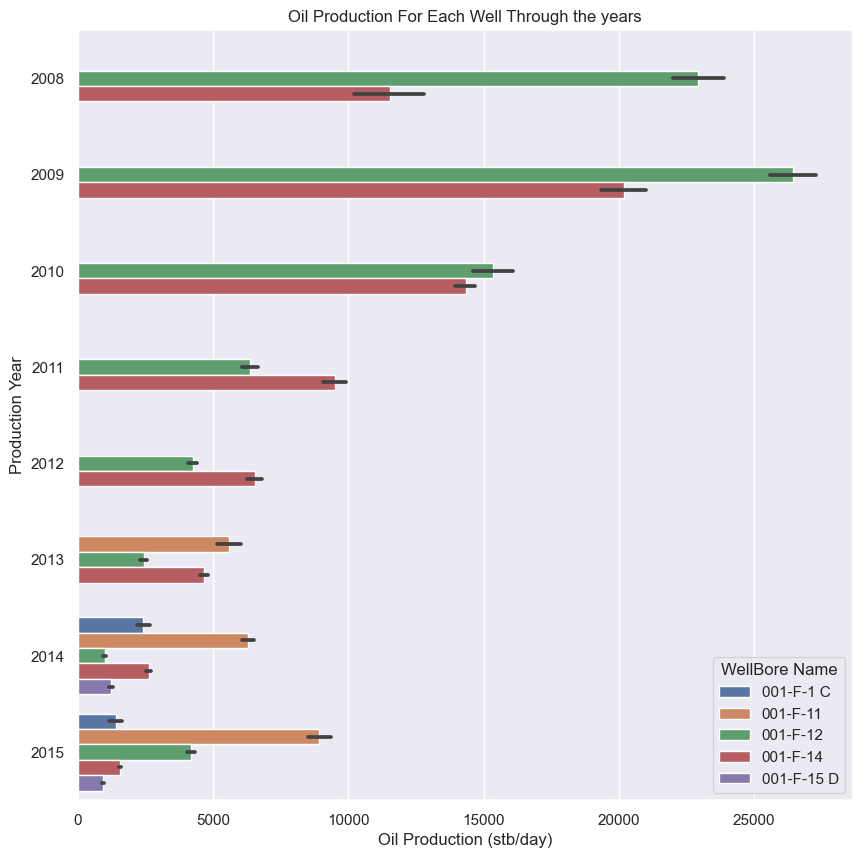

In [16]:
# Visualization of the oil production for each well through the years

sns.set(style="darkgrid")
sns.barplot(y='Production Year', x='Oil Production (stb/day)', hue='WellBore Name', data=df_train, orient='h')
plt.title('Oil Production For Each Well Through the years')

Text(0.5, 1.0, 'Gas Volume For Each Well Through the years')

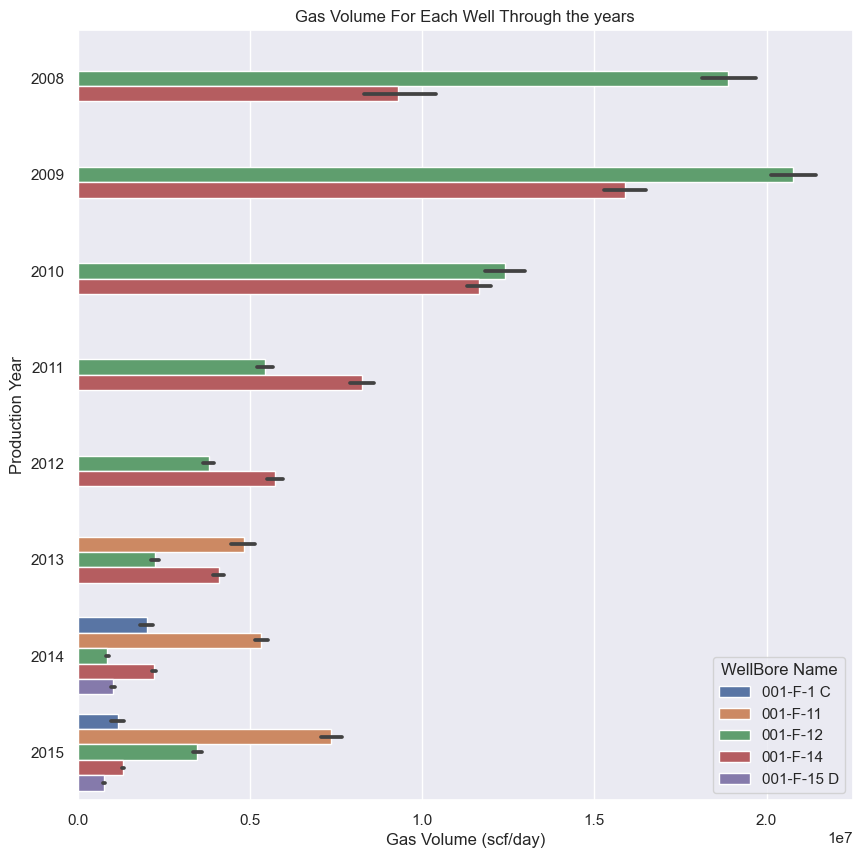

In [17]:
# Visualization of the Gas volume for each well through the years

sns.set(style="darkgrid")
sns.barplot(y='Production Year', x='Gas Volume (scf/day)', hue='WellBore Name', data=df_train, orient='h')
plt.title('Gas Volume For Each Well Through the years')

Text(0.5, 1.0, 'Water Production For Each Well Through the years')

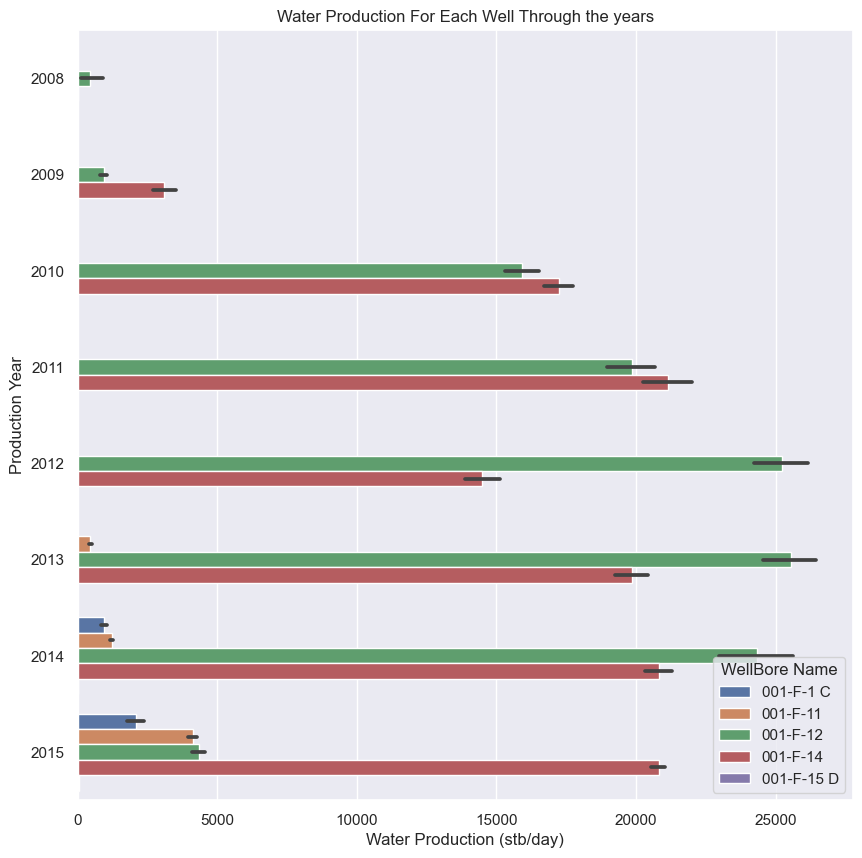

In [18]:
#Visualisation of water production for each well through the years

sns.set(style="darkgrid")
sns.barplot(y='Production Year', x='Water Production (stb/day)', hue='WellBore Name', data=df_train, orient='h')
plt.title('Water Production For Each Well Through the years')

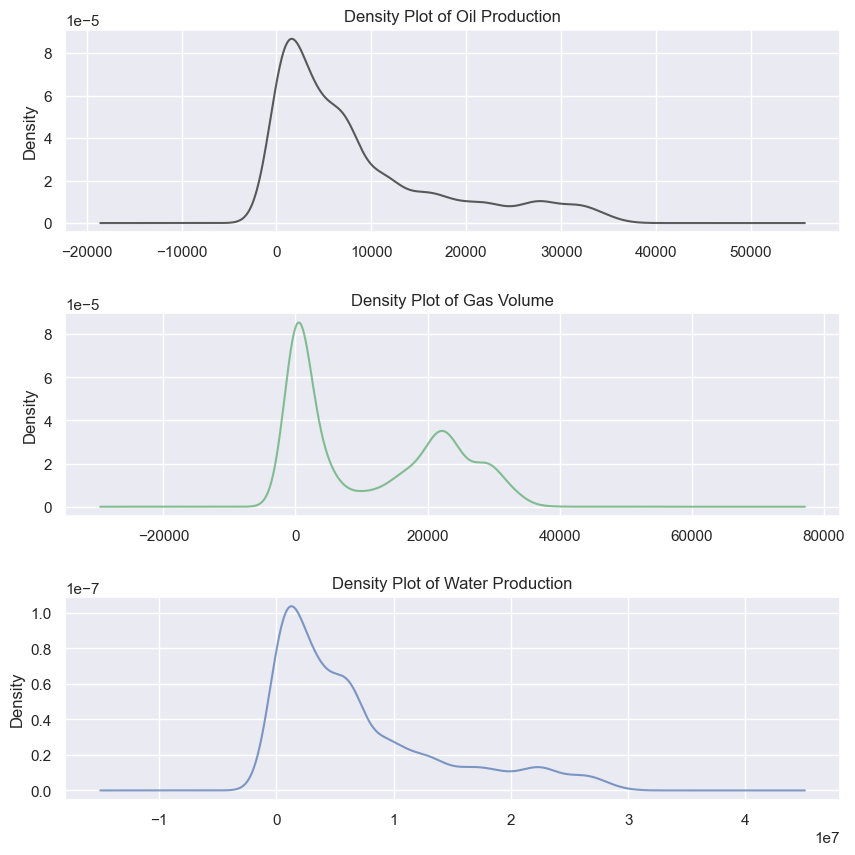

In [19]:
#Showing the continous distribution of the dataset with density plot

fig, axes = plt.subplots(3, 1)
df_train['Oil Production (stb/day)'].plot.density(ax=axes[0], color='k', alpha=0.7)
df_train['Gas Volume (scf/day)'].plot.density(ax=axes[2], color='b', alpha=0.7)
df_train['Water Production (stb/day)'].plot.density(ax=axes[1], color='g', alpha=0.7)


axes[0].set_title('Density Plot of Oil Production')
axes[1].set_title('Density Plot of Gas Volume')
axes[2].set_title('Density Plot of Water Production')

plt.subplots_adjust(hspace=0.4)

### Visualization of outliers

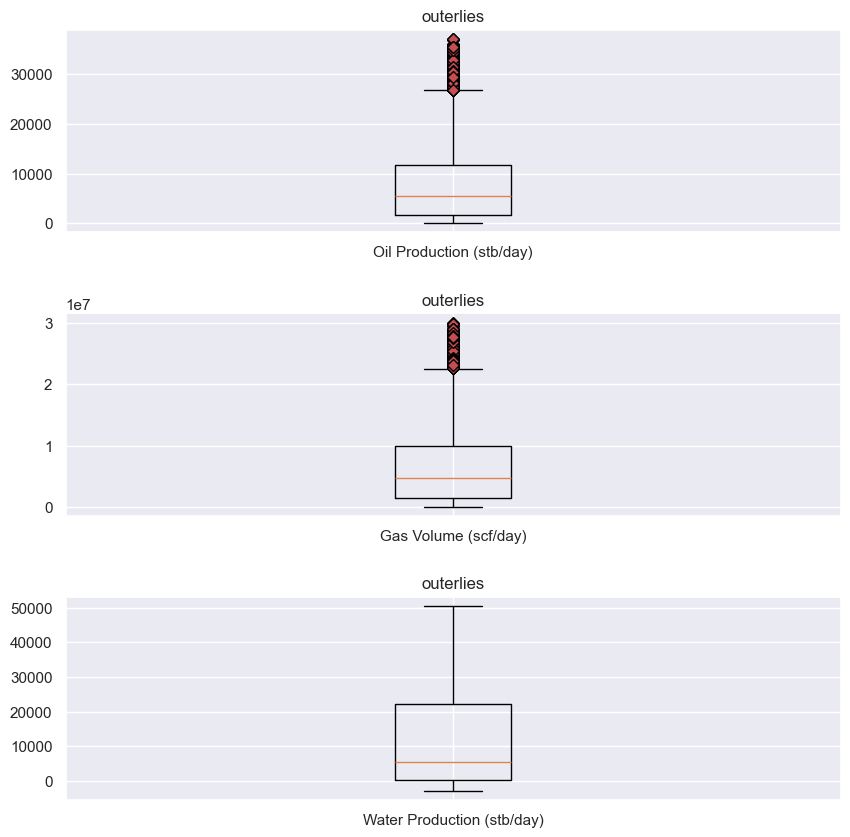

In [20]:
fig, axes = plt.subplots(3, 1)

# create outlier point shape
red_diamond = dict(markerfacecolor='r', marker='D')


# make the boxplot
axes[0].boxplot(df_train['Oil Production (stb/day)'].values, labels=['Oil Production (stb/day)'], flierprops=red_diamond);
axes[1].boxplot(df_train['Gas Volume (scf/day)'].values, labels=['Gas Volume (scf/day)'], flierprops=red_diamond);
axes[2].boxplot(df_train['Water Production (stb/day)'].values, labels=['Water Production (stb/day)'], flierprops=red_diamond);

# set title
axes[0].set_title('outerlies')
axes[1].set_title('outerlies')
axes[2].set_title('outerlies')

plt.subplots_adjust(hspace=0.4)

plt.show()

Note: No treatment were given to outliers because every data entry matters in the oil, gas and water production prediction

### Visualization of the main training dataset feataures

C:\Users\USER\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

<Figure size 600x400 with 0 Axes>

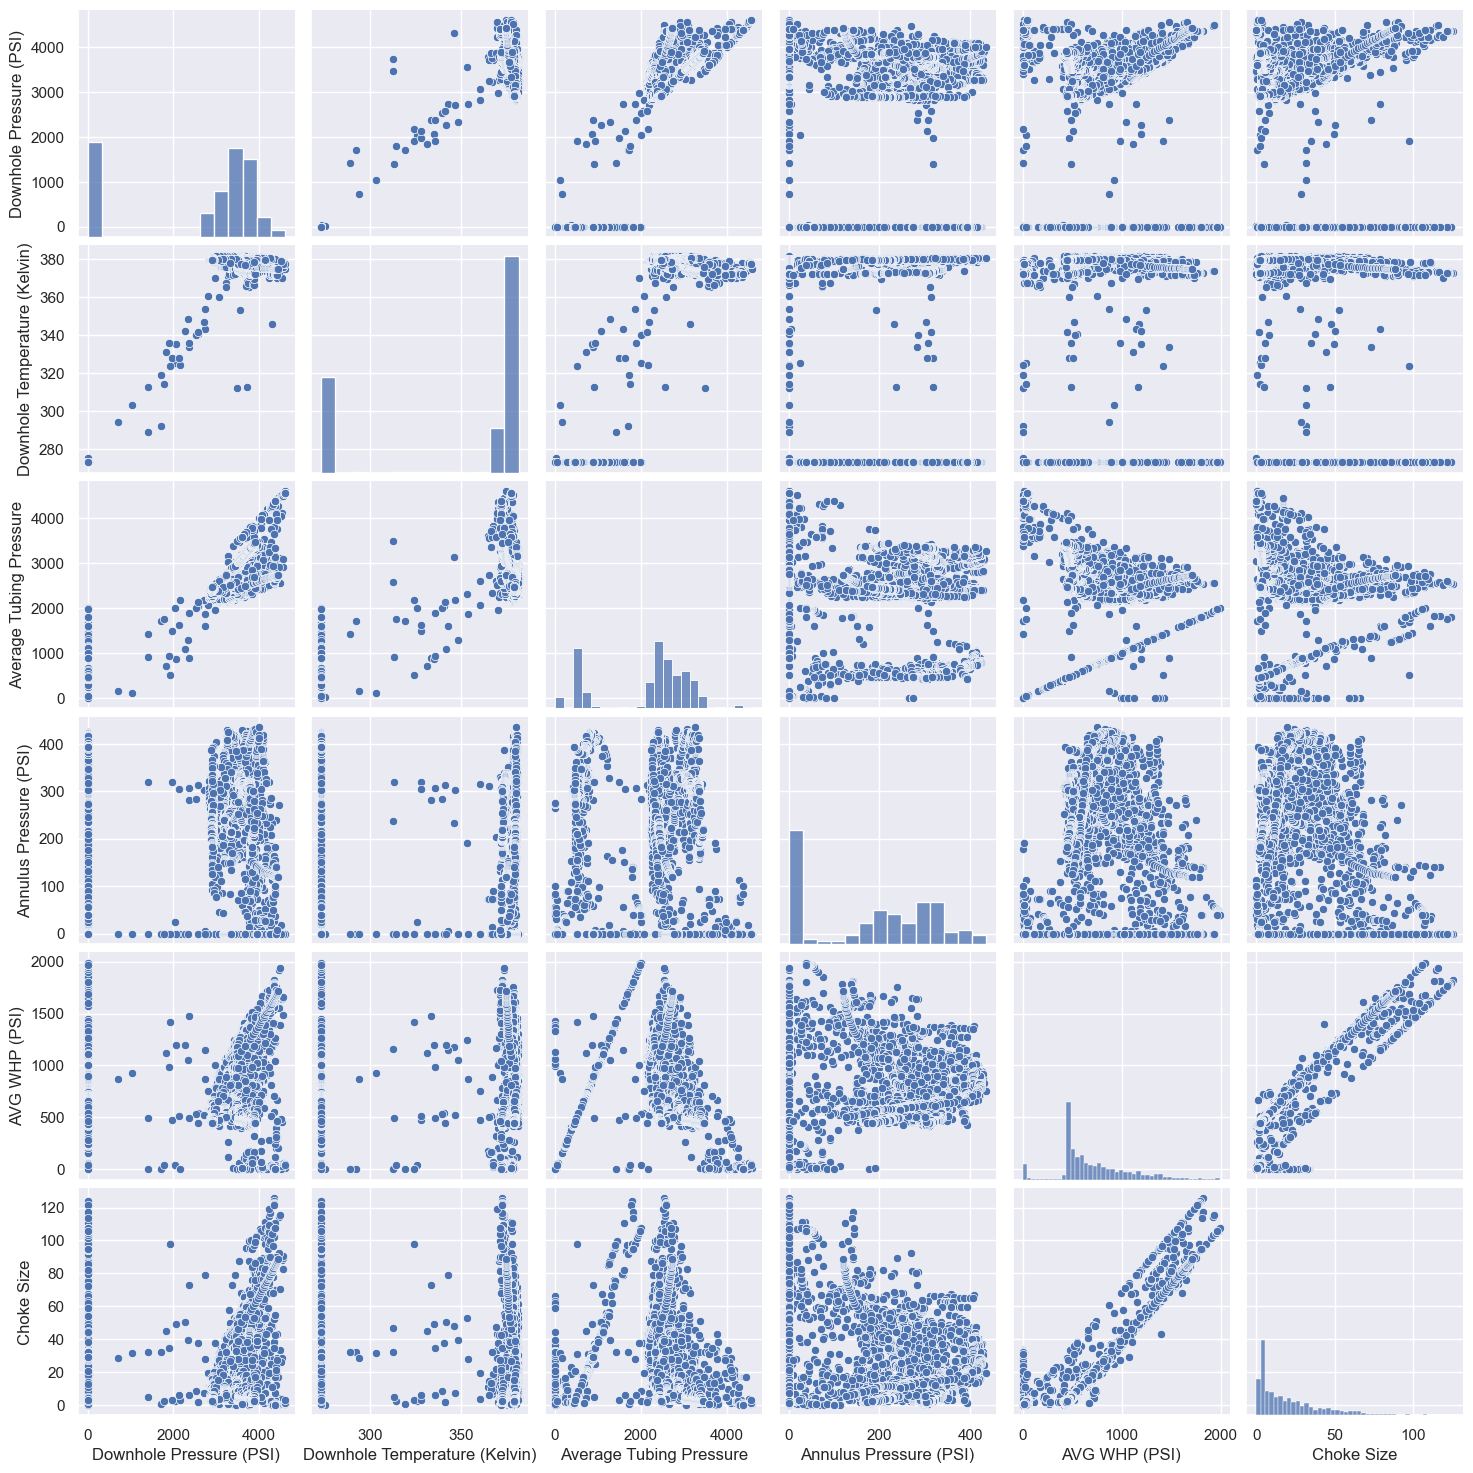

In [21]:
#Visualization (Pairplot) for the features dataset

plt.figure(figsize=(6,4))
sns.pairplot(df_train[['Downhole Pressure (PSI)', 'Downhole Temperature (Kelvin)', 
                            'Average Tubing Pressure', 'Annulus Pressure (PSI)', 
                            'AVG WHP (PSI)', 'Choke Size']])
plt.show()

In [22]:
df_train_features = df_train[['Downhole Pressure (PSI)','Downhole Temperature (Kelvin)', 
                              'Average Tubing Pressure', 'Annulus Pressure (PSI)', 
                              'AVG WHP (PSI)', 'Choke Size', 'Oil Production (stb/day)', 
                              'Gas Volume (scf/day)', 'Water Production (stb/day)']]
df_train_features.head()

,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0
1,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0
2,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0
3,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0
4,4500.45403,370.02589,4020.53477,0.0,479.91926,33.07195,0.0,0.0,0.0


computing the correlation of the main training data features

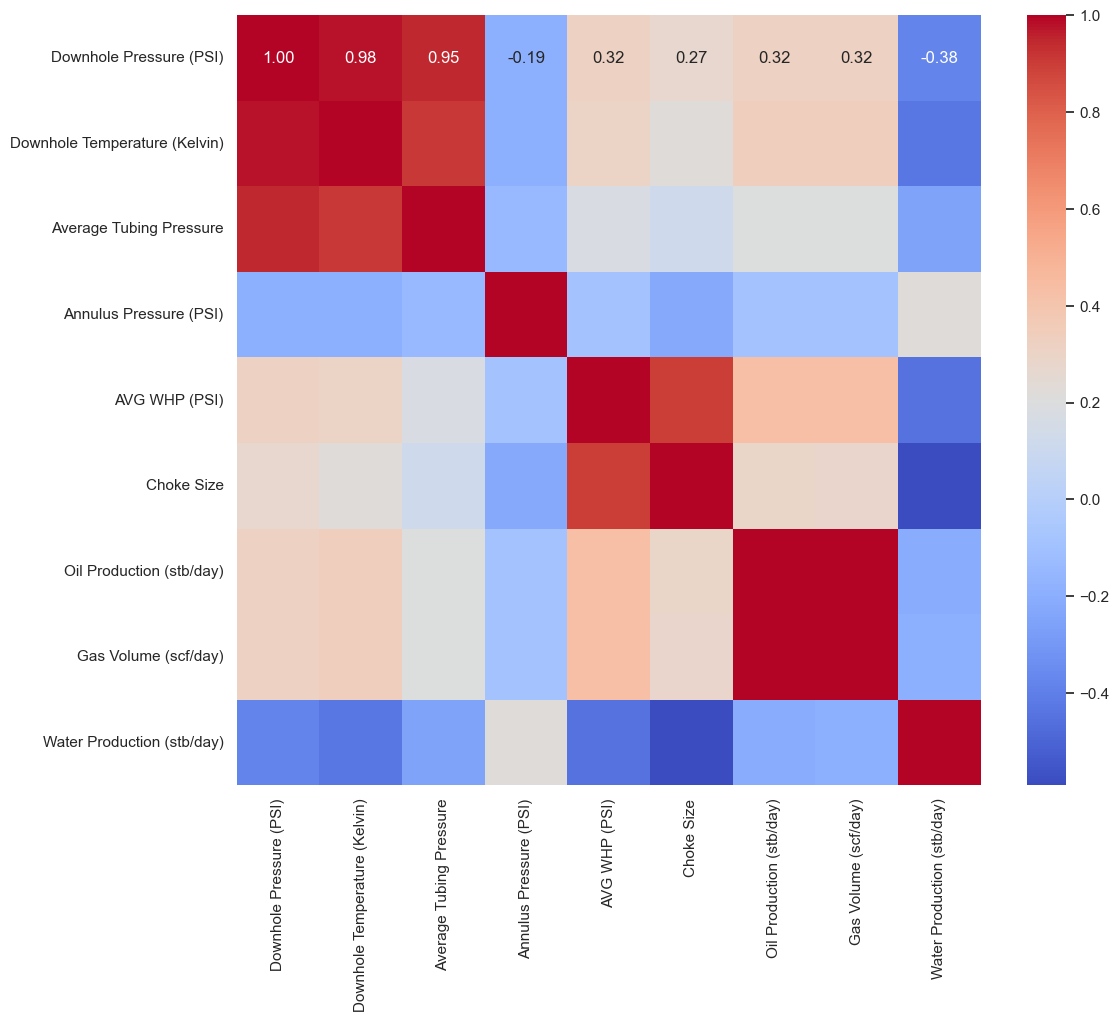

In [23]:
# Correlation Between the variables
corr_matrix = df_train_features.corr().round(2)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm',fmt='.2f')
plt.show()

# Building The Model

### Data Preparation for Model fitting

In [24]:
# Loading the dataset

train_dataset = pd.read_csv('dseats_2024_training_dataset.csv')
validation_dataset = pd.read_csv('dseats_2024_validation_dataset.csv')

print(train_dataset.head())
print(train_dataset.info())

print(train_dataset.isnull().sum())

    PRODUCTION DATE Field Name   WELL_BORE_CODE  N_WELL_BORE_CODE  \
0  07/04/2014 00:00      DSEAT  DSEAT-001-F-1 C               105   
1  08/04/2014 00:00      DSEAT  DSEAT-001-F-1 C               105   
2  09/04/2014 00:00      DSEAT  DSEAT-001-F-1 C               105   
3  10/04/2014 00:00      DSEAT  DSEAT-001-F-1 C               105   
4  11/04/2014 00:00      DSEAT  DSEAT-001-F-1 C               105   

  WellBore Name   FLOW_KIND WELL_TYPE  Downhole Pressure (PSI)  \
0     001-F-1 C  production        OP                  0.00000   
1     001-F-1 C  production        OP                  0.00000   
2     001-F-1 C  production        OP                  0.00000   
3     001-F-1 C  production        OP                  0.00000   
4     001-F-1 C  production        OP               4500.45403   

   Downhole Temperature (Kelvin)  Average Tubing Pressure  \
0                      273.15000                  0.00000   
1                      273.15000                  0.00000   
2    

In [25]:

# Convert 'PRODUCTION DATE' to datetime
train_dataset['PRODUCTION DATE'] = pd.to_datetime(train_dataset['PRODUCTION DATE'], 
                                               infer_datetime_format=True, errors='coerce')
validation_dataset['PRODUCTION DATE'] = pd.to_datetime(validation_dataset['PRODUCTION DATE'], 
                                                    infer_datetime_format=True, errors='coerce')

# Handle categorical variables using one-hot encoding
train_data = pd.get_dummies(train_dataset)
validation_data = pd.get_dummies(validation_dataset)

validation_data = validation_data.reindex(columns=train_data.columns, fill_value=0)

print(train_data.head())
print(train_data.info())
print(validation_data.head())
print(validation_data.info())

  PRODUCTION DATE  N_WELL_BORE_CODE  Downhole Pressure (PSI)  \
0      2014-07-04               105                  0.00000   
1      2014-08-04               105                  0.00000   
2      2014-09-04               105                  0.00000   
3      2014-10-04               105                  0.00000   
4      2014-11-04               105               4500.45403   

   Downhole Temperature (Kelvin)  Average Tubing Pressure  \
0                      273.15000                  0.00000   
1                      273.15000                  0.00000   
2                      273.15000                  0.00000   
3                      273.15000                  0.00000   
4                      370.02589               4020.53477   

   Annulus Pressure (PSI)  AVG WHP (PSI)  Choke Size  \
0                     0.0        0.00000     0.00000   
1                     0.0        0.00000     0.00000   
2                     0.0        0.00000     0.00000   
3                     0.

C:\Users\USER\AppData\Local\Temp\ipykernel_11156\498006057.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  train_dataset['PRODUCTION DATE'] = pd.to_datetime(train_dataset['PRODUCTION DATE'],
C:\Users\USER\AppData\Local\Temp\ipykernel_11156\498006057.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  validation_dataset['PRODUCTION DATE'] = pd.to_datetime(validation_dataset['PRODUCTION DATE'],


## Correlation Plot of The Features

On a usual note, correlation of the dataset features are computed to determine which columns should be dropped incase of too much features columns, which may compicate the model and result to poor generalisation ability of the model.

However, the number of features column provided in this dataset are just enough (not excessive) to train the model. Therefore no column considered as features column were dropped (Even though some features column has high correlation, such as downhole pressure(PSI) and Average tubing pressure (PSI); Choke size and AVG WHP (PSI). 

C:\Users\USER\anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


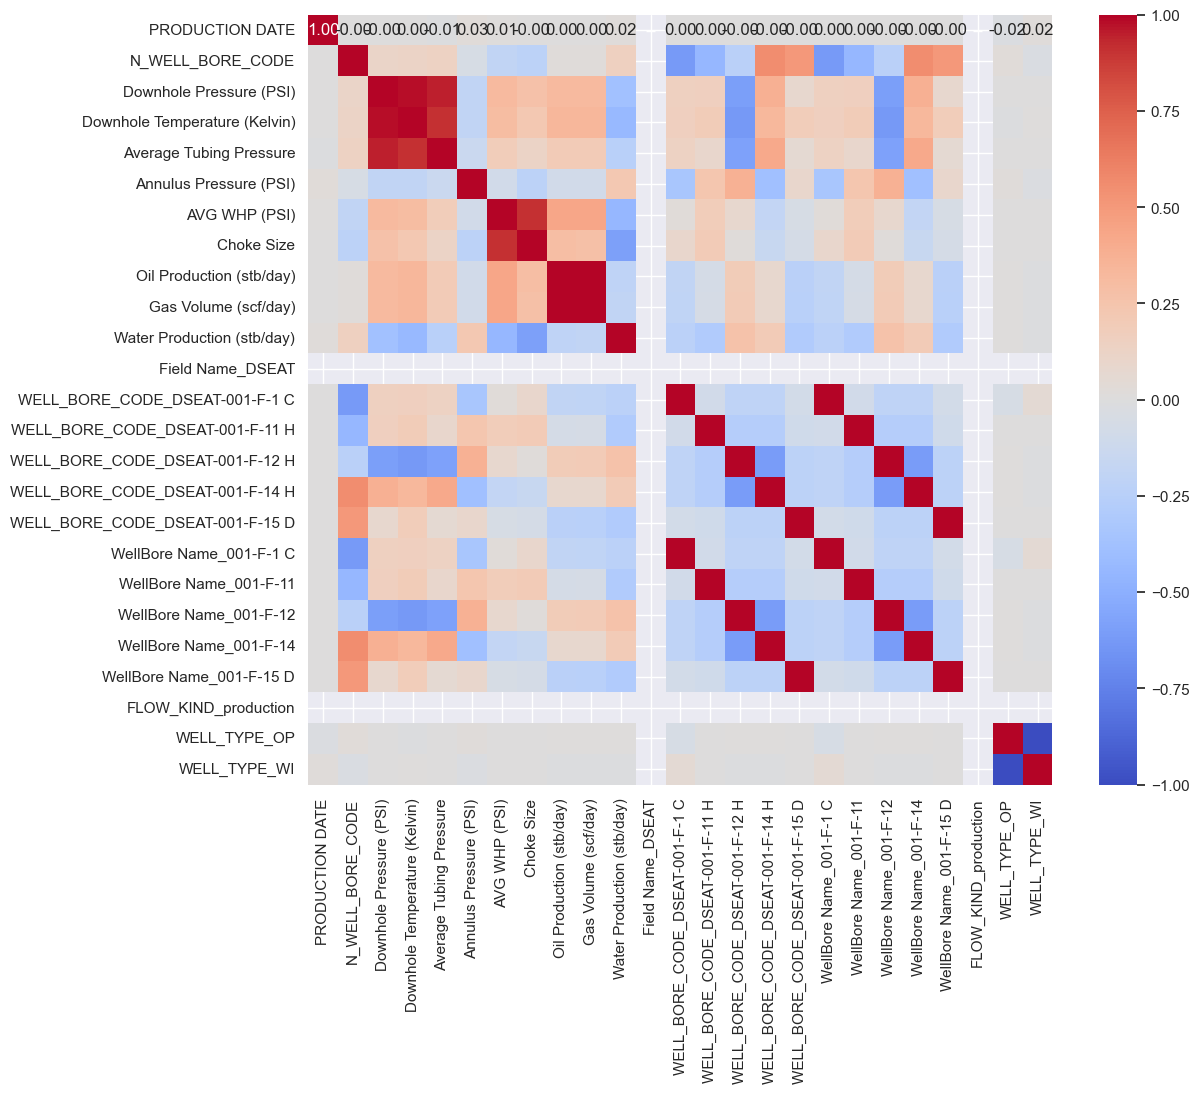

In [26]:
# Correlation Between the variables
corr_matrix = train_data.corr().round(2)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.show()

### Import the model libraries

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, recall_score
import xgboost as xgb
from sklearn.model_selection import cross_val_score

### Predicting for Oil, Gas and Water production simultaneously

In [28]:
# Splitting the dataset

X = train_data.drop(['PRODUCTION DATE', 'Oil Production (stb/day)', 
                     'Gas Volume (scf/day)', 'Water Production (stb/day)'], axis=1)
y = train_data[['Oil Production (stb/day)',
                'Gas Volume (scf/day)', 'Water Production (stb/day)']]

#Applying normalization in the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_validation = validation_data.drop(['PRODUCTION DATE', 'Oil Production (stb/day)', 
                                     'Gas Volume (scf/day)', 'Water Production (stb/day)'], 
                                    axis=1, errors='ignore')
X_validation_scaled = scaler.transform(X_validation)

print(X_scaled[:5]) 
print(X_validation_scaled[:5]) 

[[-2.34370324 -1.62902868 -1.655038   -2.05161182 -1.290552   -2.06010672
  -0.98051389  0.          3.79326889 -0.34063977 -0.77797092 -0.77797092
  -0.28876544  3.79326889 -0.34063977 -0.77797092 -0.77797092 -0.28876544
   0.          0.0120177  -0.0120177 ]
 [-2.34370324 -1.62902868 -1.655038   -2.05161182 -1.290552   -2.06010672
  -0.98051389  0.          3.79326889 -0.34063977 -0.77797092 -0.77797092
  -0.28876544  3.79326889 -0.34063977 -0.77797092 -0.77797092 -0.28876544
   0.          0.0120177  -0.0120177 ]
 [-2.34370324 -1.62902868 -1.655038   -2.05161182 -1.290552   -2.06010672
  -0.98051389  0.          3.79326889 -0.34063977 -0.77797092 -0.77797092
  -0.28876544  3.79326889 -0.34063977 -0.77797092 -0.77797092 -0.28876544
   0.          0.0120177  -0.0120177 ]
 [-2.34370324 -1.62902868 -1.655038   -2.05161182 -1.290552   -2.06010672
  -0.98051389  0.          3.79326889 -0.34063977 -0.77797092 -0.77797092
  -0.28876544  3.79326889 -0.34063977 -0.77797092 -0.77797092 -0.2887

In [29]:
# Handle missing values 
X_scaled = pd.DataFrame(X_scaled, columns=X.columns).fillna(X.mean())
X_validation_scaled = pd.DataFrame(X_validation_scaled, 
                                   columns=X_validation.columns).fillna(X_validation.mean()
                                                                       )

# Convert back to numpy arrays 
X_scaled = X_scaled.values
X_validation_scaled = X_validation_scaled.values

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, random_state=42)


rf = RandomForestRegressor(n_estimators=100,  random_state=42)
rf.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [30]:
# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model

print('Random Forest Regressor:')
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))

Random Forest Regressor:
RMSE: 923114.6078856232
MAE: 210985.83876815767
R²: 0.951284692256564


Text(0.5, 1.0, 'Random Forest Regressor')

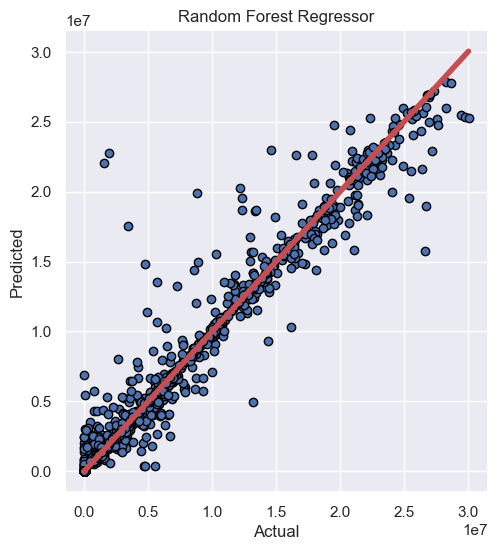

In [31]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor')

In [32]:
# Make predictions
rf_validation_pred = rf.predict(X_validation_scaled)

rf_validation_results = pd.DataFrame(rf_validation_pred, 
                                     columns=['Predicted Oil Production (stb/day)',
                                              'Predicted Gas Production (scf/day)',
                                              'Predicted Water Production (stb/day)'])

# Uncomment to save the predictions to a CSV file 
# rf_validation_results.to_csv('rf_validation_predictions3.csv', index=False)

print(rf_validation_results.head())

   Predicted Oil Production (stb/day)  Predicted Gas Production (scf/day)  \
0                         1364.817409                        1.164826e+06   
1                         1310.649187                        1.087479e+06   
2                           86.900124                        7.575167e+04   
3                            0.000000                        0.000000e+00   
4                           13.596464                        1.175921e+04   

   Predicted Water Production (stb/day)  
0                           1658.273585  
1                           1878.297785  
2                            138.663050  
3                              0.000000  
4                             28.118816  


### Predicting for Oil Production

In [33]:
# Handle categorical variables using one-hot encoding
train_data = pd.get_dummies(train_dataset)
validation_data = pd.get_dummies(validation_dataset)

validation_data = validation_data.reindex(columns=train_data.columns, fill_value=0)

In [34]:
# Splitting the dataset

X = train_data.drop(['PRODUCTION DATE', 'Oil Production (stb/day)', 
                     'Gas Volume (scf/day)', 'Water Production (stb/day)'], axis=1)
y = train_data['Oil Production (stb/day)']

#Applying normalization in the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_validation = validation_data.drop(['PRODUCTION DATE', 'Oil Production (stb/day)', 
                                     'Gas Volume (scf/day)', 'Water Production (stb/day)'], 
                                    axis=1, errors='ignore')
X_validation_scaled = scaler.transform(X_validation)

print(X_scaled[:5]) 
print(X_validation_scaled[:5]) 

[[-2.34370324 -1.62902868 -1.655038   -2.05161182 -1.290552   -2.06010672
  -0.98051389  0.          3.79326889 -0.34063977 -0.77797092 -0.77797092
  -0.28876544  3.79326889 -0.34063977 -0.77797092 -0.77797092 -0.28876544
   0.          0.0120177  -0.0120177 ]
 [-2.34370324 -1.62902868 -1.655038   -2.05161182 -1.290552   -2.06010672
  -0.98051389  0.          3.79326889 -0.34063977 -0.77797092 -0.77797092
  -0.28876544  3.79326889 -0.34063977 -0.77797092 -0.77797092 -0.28876544
   0.          0.0120177  -0.0120177 ]
 [-2.34370324 -1.62902868 -1.655038   -2.05161182 -1.290552   -2.06010672
  -0.98051389  0.          3.79326889 -0.34063977 -0.77797092 -0.77797092
  -0.28876544  3.79326889 -0.34063977 -0.77797092 -0.77797092 -0.28876544
   0.          0.0120177  -0.0120177 ]
 [-2.34370324 -1.62902868 -1.655038   -2.05161182 -1.290552   -2.06010672
  -0.98051389  0.          3.79326889 -0.34063977 -0.77797092 -0.77797092
  -0.28876544  3.79326889 -0.34063977 -0.77797092 -0.77797092 -0.2887

In [35]:
# Handle missing values 
X_scaled = pd.DataFrame(X_scaled, columns=X.columns).fillna(X.mean())
X_validation_scaled = pd.DataFrame(X_validation_scaled, 
                                   columns=X_validation.columns).fillna(X_validation.mean()
                                                                       )

# Convert back to numpy arrays 
X_scaled = X_scaled.values
X_validation_scaled = X_validation_scaled.values

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, random_state=42)

# fitting the model
rf1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf1.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
# Make predictions
y_pred_oil = rf1.predict(X_test)

# Evaluate the model

rf_rmse_oil = np.sqrt(mean_squared_error(y_test, y_pred_oil))
rf_mae_oil = mean_absolute_error(y_test, y_pred_oil)
rf_r2_oil = r2_score(y_test, y_pred_oil)

print('Random Forest Regressor:')
print('RMSE:', rf_rmse_oil)
print('MAE:', rf_mae_oil)
print('R²:', rf_r2_oil)

Random Forest Regressor:
RMSE: 2005.8217851533607
MAE: 762.3166763376339
R²: 0.9493382634062542


Text(0.5, 1.0, 'Random Forest Regressor')

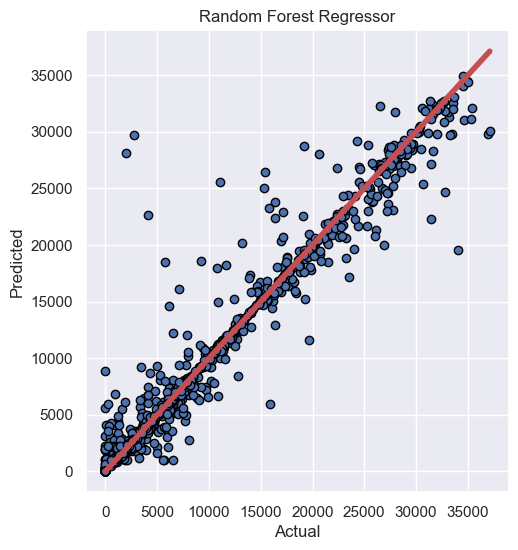

In [37]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_oil, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor')

In [38]:
rf_validation_pred_oil = rf1.predict(X_validation_scaled)
rf_validation_pred_oil = rf_validation_pred_oil.flatten()

# Display the first few predictions
rf_validation_pred_oil[:5]
#rf_validation_results_oil = pd.DataFrame({'Predicted Oil Production (stb/day)': rf_validation_pred_oil.flatten()})

array([1542.824409, 1406.491804,   95.785378,    8.109068,   20.478353])

### Predicting for Gas Production

In [39]:
# Handle categorical variables using one-hot encoding
train_data = pd.get_dummies(train_dataset)
validation_data = pd.get_dummies(validation_dataset)

validation_data = validation_data.reindex(columns=train_data.columns, fill_value=0)

In [40]:
# Splitting the dataset

X = train_data.drop(['PRODUCTION DATE', 'Oil Production (stb/day)', 
                     'Gas Volume (scf/day)', 'Water Production (stb/day)'], axis=1)
y = train_data['Gas Volume (scf/day)']

#Applying normalization in the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_validation = validation_data.drop(['PRODUCTION DATE', 'Oil Production (stb/day)', 
                                     'Gas Volume (scf/day)', 'Water Production (stb/day)'], 
                                    axis=1, errors='ignore')
X_validation_scaled = scaler.transform(X_validation)

print(X_scaled[:5]) 
print(X_validation_scaled[:5]) 

[[-2.34370324 -1.62902868 -1.655038   -2.05161182 -1.290552   -2.06010672
  -0.98051389  0.          3.79326889 -0.34063977 -0.77797092 -0.77797092
  -0.28876544  3.79326889 -0.34063977 -0.77797092 -0.77797092 -0.28876544
   0.          0.0120177  -0.0120177 ]
 [-2.34370324 -1.62902868 -1.655038   -2.05161182 -1.290552   -2.06010672
  -0.98051389  0.          3.79326889 -0.34063977 -0.77797092 -0.77797092
  -0.28876544  3.79326889 -0.34063977 -0.77797092 -0.77797092 -0.28876544
   0.          0.0120177  -0.0120177 ]
 [-2.34370324 -1.62902868 -1.655038   -2.05161182 -1.290552   -2.06010672
  -0.98051389  0.          3.79326889 -0.34063977 -0.77797092 -0.77797092
  -0.28876544  3.79326889 -0.34063977 -0.77797092 -0.77797092 -0.28876544
   0.          0.0120177  -0.0120177 ]
 [-2.34370324 -1.62902868 -1.655038   -2.05161182 -1.290552   -2.06010672
  -0.98051389  0.          3.79326889 -0.34063977 -0.77797092 -0.77797092
  -0.28876544  3.79326889 -0.34063977 -0.77797092 -0.77797092 -0.2887

In [41]:
# Handle missing values 
X_scaled = pd.DataFrame(X_scaled, columns=X.columns).fillna(X.mean())
X_validation_scaled = pd.DataFrame(X_validation_scaled, 
                                   columns=X_validation.columns).fillna(X_validation.mean()
                                                                       )

# Convert back to numpy arrays 
X_scaled = X_scaled.values
X_validation_scaled = X_validation_scaled.values

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, random_state=42)


rf2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf2.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [42]:
# Make predictions
y_pred_gas = rf2.predict(X_test)
rf_rmse_gas = np.sqrt(mean_squared_error(y_test, y_pred_gas))
rf_mae_gas = mean_absolute_error(y_test, y_pred_gas)
rf_r2_gas = r2_score(y_test, y_pred_gas)

# Evaluate the model
print('Random Forest Regressor:')
print('RMSE:', rf_rmse_gas)
print('MAE:', rf_mae_gas)
print('R²:', rf_r2_gas)

Random Forest Regressor:
RMSE: 1600034.503867676
MAE: 634861.9486655131
R²: 0.9488187452526508


Text(0.5, 1.0, 'Random Forest Regressor')

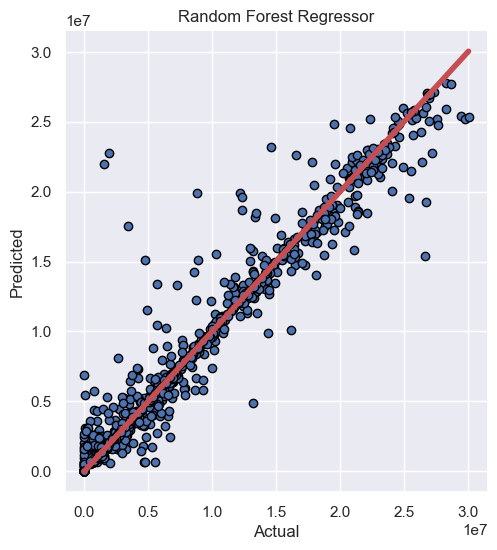

In [43]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_gas, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor')

In [44]:
rf_validation_pred_gas = rf2.predict(X_validation_scaled)

rf_validation_pred_gas = rf_validation_pred_gas.flatten()

# Display the first few predictions
rf_validation_pred_gas[:5]

array([1169995.21616,  982715.85618,  146849.82854,    2333.57004,
        536269.7704 ])

### Predicting for Water Production

In [45]:
# Handle categorical variables using one-hot encoding
train_data = pd.get_dummies(train_dataset)
validation_data = pd.get_dummies(validation_dataset)

validation_data = validation_data.reindex(columns=train_data.columns, fill_value=0)

In [46]:
# Splitting the dataset

X = train_data.drop(['PRODUCTION DATE', 'Oil Production (stb/day)', 
                     'Gas Volume (scf/day)', 'Water Production (stb/day)'], axis=1)
y = train_data['Water Production (stb/day)']

#Applying normalization in the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_validation = validation_data.drop(['PRODUCTION DATE', 'Oil Production (stb/day)', 
                                     'Gas Volume (scf/day)', 'Water Production (stb/day)'], 
                                    axis=1, errors='ignore')
X_validation_scaled = scaler.transform(X_validation)

print(X_scaled[:5]) 
print(X_validation_scaled[:5]) 

[[-2.34370324 -1.62902868 -1.655038   -2.05161182 -1.290552   -2.06010672
  -0.98051389  0.          3.79326889 -0.34063977 -0.77797092 -0.77797092
  -0.28876544  3.79326889 -0.34063977 -0.77797092 -0.77797092 -0.28876544
   0.          0.0120177  -0.0120177 ]
 [-2.34370324 -1.62902868 -1.655038   -2.05161182 -1.290552   -2.06010672
  -0.98051389  0.          3.79326889 -0.34063977 -0.77797092 -0.77797092
  -0.28876544  3.79326889 -0.34063977 -0.77797092 -0.77797092 -0.28876544
   0.          0.0120177  -0.0120177 ]
 [-2.34370324 -1.62902868 -1.655038   -2.05161182 -1.290552   -2.06010672
  -0.98051389  0.          3.79326889 -0.34063977 -0.77797092 -0.77797092
  -0.28876544  3.79326889 -0.34063977 -0.77797092 -0.77797092 -0.28876544
   0.          0.0120177  -0.0120177 ]
 [-2.34370324 -1.62902868 -1.655038   -2.05161182 -1.290552   -2.06010672
  -0.98051389  0.          3.79326889 -0.34063977 -0.77797092 -0.77797092
  -0.28876544  3.79326889 -0.34063977 -0.77797092 -0.77797092 -0.2887

In [47]:
# Handle missing values 
X_scaled = pd.DataFrame(X_scaled, columns=X.columns).fillna(X.mean())
X_validation_scaled = pd.DataFrame(X_validation_scaled, 
                                   columns=X_validation.columns).fillna(X_validation.mean()
                                                                       )

# Convert back to numpy arrays 
X_scaled = X_scaled.values
X_validation_scaled = X_validation_scaled.values

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, random_state=42)


rf3 = RandomForestRegressor(n_estimators=100, random_state=42)
rf3.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [48]:
# Make predictions
y_pred_water = rf3.predict(X_test)

rf_rmse_water = np.sqrt(mean_squared_error(y_test, y_pred_water))
rf_mae_water = mean_absolute_error(y_test, y_pred_water)
rf_r2_water = r2_score(y_test, y_pred_water)

# Evaluate the model
print('Random Forest Regressor:')
print('RMSE:', rf_rmse_water)
print('MAE:', rf_mae_water)
print('R²:', rf_r2_water)

Random Forest Regressor:
RMSE: 2339.027127952502
MAE: 946.5015405777394
R²: 0.9588671854093949


Text(0.5, 1.0, 'Random Forest Regressor')

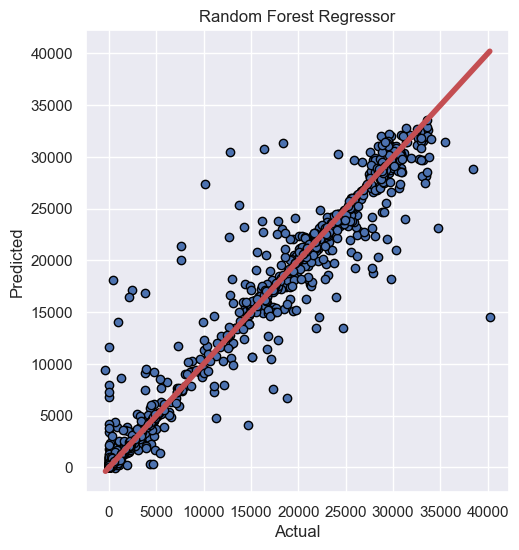

In [49]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_water, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor')

In [50]:
rf_validation_pred_water = rf3.predict(X_validation_scaled)

rf_validation_pred_water = rf_validation_pred_water.flatten()

Creating a file for predicted Production

In [51]:
#Converting the predicted productions into a dataframe object
validation_results = pd.DataFrame({'Predicted Oil Production (stb/day)': rf_validation_pred_oil,
                                   'Predicted Gas Volume (scf/day)': rf_validation_pred_gas,
                                   'Predicted Water Production (stb/day)': rf_validation_pred_water})
validation_results = validation_results[:2075]

# Save the predictions to a CSV file
validation_results.to_csv('Emmanuel_Ogunnubi_2024_DSEATS_Datathon_5540411.csv', index=False)

# Display the first few predictions
print(validation_results.head(10))

   Predicted Oil Production (stb/day)  Predicted Gas Volume (scf/day)  \
0                         1542.824409                    1.169995e+06   
1                         1406.491804                    9.827159e+05   
2                           95.785378                    1.468498e+05   
3                            8.109068                    2.333570e+03   
4                           20.478353                    5.362698e+05   
5                          246.605740                    1.980973e+05   
6                            0.000000                    5.005540e+00   
7                            0.000000                    0.000000e+00   
8                            0.000000                    0.000000e+00   
9                            0.000000                    0.000000e+00   

   Predicted Water Production (stb/day)  
0                           3675.152650  
1                           1994.525034  
2                            739.539202  
3                           

Total Predicted Volume

In [52]:
print('Total Predicted Oil Production (stb/day):', validation_results['Predicted Oil Production (stb/day)'].sum())
print('Total Predicted Oil Production (stb/day):', validation_results['Predicted Gas Volume (scf/day)'].sum())
print('Total Predicted Water Production (stb/day):', validation_results['Predicted Water Production (stb/day)'].sum())

Total Predicted Oil Production (stb/day): 5456954.360886253
Total Predicted Oil Production (stb/day): 4313873669.061754
Total Predicted Water Production (stb/day): 16348024.48564532


In [53]:
# Cross-validation for Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf_cv_rmse_water = -cross_val_score(rf, X_scaled, y, scoring='neg_root_mean_squared_error', cv=5)
rf_cv_r2_water = cross_val_score(rf, X_scaled, y, scoring='r2', cv=5)

print('Random Forest Regressor Cross-Validation:')
print('Average RMSE:', rf_cv_rmse_water.mean())
print('Average R²:', rf_cv_r2_water.mean())

Random Forest Regressor Cross-Validation:
Average RMSE: 8858.433697205506
Average R²: -0.5045106185115866


### XGBOOST MODEL

Data preparation for xgboost Oil Prediction

In [54]:
# Handle categorical variables using one-hot encoding
train_data = pd.get_dummies(train_dataset)
validation_data = pd.get_dummies(validation_dataset)

validation_data = validation_data.reindex(columns=train_data.columns, fill_value=0)

In [55]:
# Splitting the dataset

X = train_data.drop(['PRODUCTION DATE', 'Oil Production (stb/day)', 
                     'Gas Volume (scf/day)', 'Water Production (stb/day)'], axis=1)
y = train_data['Oil Production (stb/day)']

#Applying normalization in the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_validation = validation_data.drop(['PRODUCTION DATE', 'Oil Production (stb/day)', 
                                     'Gas Volume (scf/day)', 'Water Production (stb/day)'], 
                                    axis=1, errors='ignore')
X_validation_scaled = scaler.transform(X_validation)

print(X_scaled[:5]) 
print(X_validation_scaled[:5]) 

[[-2.34370324 -1.62902868 -1.655038   -2.05161182 -1.290552   -2.06010672
  -0.98051389  0.          3.79326889 -0.34063977 -0.77797092 -0.77797092
  -0.28876544  3.79326889 -0.34063977 -0.77797092 -0.77797092 -0.28876544
   0.          0.0120177  -0.0120177 ]
 [-2.34370324 -1.62902868 -1.655038   -2.05161182 -1.290552   -2.06010672
  -0.98051389  0.          3.79326889 -0.34063977 -0.77797092 -0.77797092
  -0.28876544  3.79326889 -0.34063977 -0.77797092 -0.77797092 -0.28876544
   0.          0.0120177  -0.0120177 ]
 [-2.34370324 -1.62902868 -1.655038   -2.05161182 -1.290552   -2.06010672
  -0.98051389  0.          3.79326889 -0.34063977 -0.77797092 -0.77797092
  -0.28876544  3.79326889 -0.34063977 -0.77797092 -0.77797092 -0.28876544
   0.          0.0120177  -0.0120177 ]
 [-2.34370324 -1.62902868 -1.655038   -2.05161182 -1.290552   -2.06010672
  -0.98051389  0.          3.79326889 -0.34063977 -0.77797092 -0.77797092
  -0.28876544  3.79326889 -0.34063977 -0.77797092 -0.77797092 -0.2887

In [56]:
# Handle missing values 
X_scaled = pd.DataFrame(X_scaled, columns=X.columns).fillna(X.mean())
X_validation_scaled = pd.DataFrame(X_validation_scaled, 
                                   columns=X_validation.columns).fillna(X_validation.mean()
                                                                       )

# Convert back to numpy arrays 
X_scaled = X_scaled.values
X_validation_scaled = X_validation_scaled.values

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, random_state=42)

# Train an XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [57]:
y_pred_xgb1 = xg_reg.predict(X_test)

# Evaluate the model
xgb_rmse_oil = np.sqrt(mean_squared_error(y_test, y_pred_xgb1))
xgb_mae_oil = mean_absolute_error(y_test, y_pred_xgb1)
xgb_r2_oil = r2_score(y_test, y_pred_xgb1)

print('XGBoost Regressor:')
print('RMSE:', xgb_rmse_oil)
print('MAE:', xgb_mae_oil)
print('R²:', xgb_r2_oil)

XGBoost Regressor:
RMSE: 2495.196768658629
MAE: 1307.5150738780726
R²: 0.9216020000206738


Xgboost For gas prediction

In [58]:
# Handle categorical variables using one-hot encoding
train_data = pd.get_dummies(train_dataset)
validation_data = pd.get_dummies(validation_dataset)

validation_data = validation_data.reindex(columns=train_data.columns, fill_value=0)

In [59]:
# Splitting the dataset

X = train_data.drop(['PRODUCTION DATE', 'Oil Production (stb/day)', 
                     'Gas Volume (scf/day)', 'Water Production (stb/day)'], axis=1)
y = train_data['Gas Volume (scf/day)']

#Applying normalization in the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_validation = validation_data.drop(['PRODUCTION DATE', 'Oil Production (stb/day)', 
                                     'Gas Volume (scf/day)', 'Water Production (stb/day)'], 
                                    axis=1, errors='ignore')
X_validation_scaled = scaler.transform(X_validation)

print(X_scaled[:5]) 
print(X_validation_scaled[:5]) 

[[-2.34370324 -1.62902868 -1.655038   -2.05161182 -1.290552   -2.06010672
  -0.98051389  0.          3.79326889 -0.34063977 -0.77797092 -0.77797092
  -0.28876544  3.79326889 -0.34063977 -0.77797092 -0.77797092 -0.28876544
   0.          0.0120177  -0.0120177 ]
 [-2.34370324 -1.62902868 -1.655038   -2.05161182 -1.290552   -2.06010672
  -0.98051389  0.          3.79326889 -0.34063977 -0.77797092 -0.77797092
  -0.28876544  3.79326889 -0.34063977 -0.77797092 -0.77797092 -0.28876544
   0.          0.0120177  -0.0120177 ]
 [-2.34370324 -1.62902868 -1.655038   -2.05161182 -1.290552   -2.06010672
  -0.98051389  0.          3.79326889 -0.34063977 -0.77797092 -0.77797092
  -0.28876544  3.79326889 -0.34063977 -0.77797092 -0.77797092 -0.28876544
   0.          0.0120177  -0.0120177 ]
 [-2.34370324 -1.62902868 -1.655038   -2.05161182 -1.290552   -2.06010672
  -0.98051389  0.          3.79326889 -0.34063977 -0.77797092 -0.77797092
  -0.28876544  3.79326889 -0.34063977 -0.77797092 -0.77797092 -0.2887

In [60]:
# Handle missing values 
X_scaled = pd.DataFrame(X_scaled, columns=X.columns).fillna(X.mean())
X_validation_scaled = pd.DataFrame(X_validation_scaled, 
                                   columns=X_validation.columns).fillna(X_validation.mean()
                                                                       )

# Convert back to numpy arrays 
X_scaled = X_scaled.values
X_validation_scaled = X_validation_scaled.values

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, random_state=42)

# Train an XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [61]:
y_pred_xgb2 = xg_reg.predict(X_test)

# Evaluate the model
xgb_rmse_gas = np.sqrt(mean_squared_error(y_test, y_pred_xgb2))
xgb_mae_gas = mean_absolute_error(y_test, y_pred_xgb2)
xgb_r2_gas = r2_score(y_test, y_pred_xgb2)

print('XGBoost Regressor:')
print('RMSE:', xgb_rmse_gas)
print('MAE:', xgb_mae_gas)
print('R²:', xgb_r2_gas)

XGBoost Regressor:
RMSE: 2017173.3192300075
MAE: 1076962.1556045576
R²: 0.9186535391149641


Xgboost for water prediction

In [62]:
# Handle categorical variables using one-hot encoding
train_data = pd.get_dummies(train_dataset)
validation_data = pd.get_dummies(validation_dataset)

validation_data = validation_data.reindex(columns=train_data.columns, fill_value=0)

In [63]:
# Splitting the dataset

X = train_data.drop(['PRODUCTION DATE', 'Oil Production (stb/day)', 
                     'Gas Volume (scf/day)', 'Water Production (stb/day)'], axis=1)
y = train_data['Water Production (stb/day)']

#Applying normalization in the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_validation = validation_data.drop(['PRODUCTION DATE', 'Oil Production (stb/day)', 
                                     'Gas Volume (scf/day)', 'Water Production (stb/day)'], 
                                    axis=1, errors='ignore')
X_validation_scaled = scaler.transform(X_validation)

print(X_scaled[:5]) 
print(X_validation_scaled[:5]) 

[[-2.34370324 -1.62902868 -1.655038   -2.05161182 -1.290552   -2.06010672
  -0.98051389  0.          3.79326889 -0.34063977 -0.77797092 -0.77797092
  -0.28876544  3.79326889 -0.34063977 -0.77797092 -0.77797092 -0.28876544
   0.          0.0120177  -0.0120177 ]
 [-2.34370324 -1.62902868 -1.655038   -2.05161182 -1.290552   -2.06010672
  -0.98051389  0.          3.79326889 -0.34063977 -0.77797092 -0.77797092
  -0.28876544  3.79326889 -0.34063977 -0.77797092 -0.77797092 -0.28876544
   0.          0.0120177  -0.0120177 ]
 [-2.34370324 -1.62902868 -1.655038   -2.05161182 -1.290552   -2.06010672
  -0.98051389  0.          3.79326889 -0.34063977 -0.77797092 -0.77797092
  -0.28876544  3.79326889 -0.34063977 -0.77797092 -0.77797092 -0.28876544
   0.          0.0120177  -0.0120177 ]
 [-2.34370324 -1.62902868 -1.655038   -2.05161182 -1.290552   -2.06010672
  -0.98051389  0.          3.79326889 -0.34063977 -0.77797092 -0.77797092
  -0.28876544  3.79326889 -0.34063977 -0.77797092 -0.77797092 -0.2887

In [64]:
# Handle missing values 
X_scaled = pd.DataFrame(X_scaled, columns=X.columns).fillna(X.mean())
X_validation_scaled = pd.DataFrame(X_validation_scaled, 
                                   columns=X_validation.columns).fillna(X_validation.mean()
                                                                       )

# Convert back to numpy arrays 
X_scaled = X_scaled.values
X_validation_scaled = X_validation_scaled.values

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, random_state=42)

# Train an XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, 
                          learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [65]:
y_pred_xgb3 = xg_reg.predict(X_test)

# Evaluate the model
xgb_rmse_water = np.sqrt(mean_squared_error(y_test, y_pred_xgb3))
xgb_mae_water = mean_absolute_error(y_test, y_pred_xgb3)
xgb_r2_water = r2_score(y_test, y_pred_xgb3)

print('XGBoost Regressor:')
print('RMSE:', xgb_rmse_water)
print('MAE:', xgb_mae_water)
print('R²:', xgb_r2_water)

XGBoost Regressor:
RMSE: 2588.6954514912995
MAE: 1408.8623704567824
R²: 0.949617486300008


### Data Preparation for Deep Learning

deep learning for oil production prediction

In [66]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

train_data = pd.read_csv('dseats_2024_training_dataset.csv')
validation_data = pd.read_csv('dseats_2024_validation_dataset.csv')

X = train_data.drop(['PRODUCTION DATE', 'Oil Production (stb/day)', 
                     'Gas Volume (scf/day)', 'Water Production (stb/day)'], axis=1)
y = train_data['Oil Production (stb/day)']

categorical_columns = X.select_dtypes(include=['object']).columns

X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
X_validation = pd.get_dummies(validation_data.drop(['PRODUCTION DATE', 
                                                    'Oil Production (stb/day)', 
                                                    'Gas Volume (scf/day)', 
                                                    'Water Production (stb/day)'], axis=1), 
                              columns=categorical_columns, drop_first=True)

X_validation = X_validation.reindex(columns=X.columns, fill_value=0)

X = X.fillna(X.mean())
X_validation = X_validation.fillna(X_validation.mean())

X = X.fillna(X.mean())
X_validation = X_validation.fillna(X_validation.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_validation_scaled = scaler.transform(X_validation)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, 
                                                    random_state=42)

print("Data preparation complete.")

Data preparation complete.


In [67]:
X_train.shape

(5540, 16)

In [68]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [69]:

model_o = Sequential([
    Dense(64,  activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model_o.compile(optimizer='adam', loss='mse')

# Train the model
history = model_o.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 155322736.0000 - val_loss: 144053488.0000
Epoch 2/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 153581760.0000 - val_loss: 129363432.0000
Epoch 3/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 125145656.0000 - val_loss: 95047016.0000
Epoch 4/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 91359272.0000 - val_loss: 60947692.0000
Epoch 5/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 60167428.0000 - val_loss: 45211140.0000
Epoch 6/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 50914948.0000 - val_loss: 39731728.0000
Epoch 7/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 43155100.0000 - val_loss: 37063000.0000
Epoch 8/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 39597684.0000 - val_loss: 35280032.0000
Epoch 9/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 37711024.0000 - val_loss: 33867024.0000
Epoch 10/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 36614232.0000 - val_loss

In [70]:
# making predictions
y_pred_dl = model_o.predict(X_test)

# Model Evaluation
dl_r2_oil = r2_score(y_test, y_pred_dl)
dl_mae_oil = mean_absolute_error(y_test, y_pred_dl)
dl_rmse_oil = np.sqrt(mean_squared_error(y_test, y_pred_dl))


print('MAE: ', dl_mae_oil)
print('MSE: ', dl_rmse_oil)
print('R2 Score: ', dl_r2_oil)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MAE:  2128.4712084173475
MSE:  3676.364585120982
R2 Score:  0.8298105900769637


In [71]:
validation_pred_oil = model_o.predict(X_validation_scaled)

validation_results_oil = pd.DataFrame({'Predicted oil Production (stb/day)': validation_pred_oil.flatten()})

# Uncomment to save the predictions to a CSV file
#validation_results_oil.to_csv('validation_predictions_oil11.csv', index=False)

# Display the first few predictions
print(validation_results_oil.head(10))

310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
   Predicted oil Production (stb/day)
0                         2825.931152
1                         1390.670044
2                         1241.177612
3                         1772.307739
4                         1332.744263
5                          914.171631
6                          797.682800
7                          702.644165
8                          668.641296
9                          663.121765


### Deep learning prediction for gas volume

In [72]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

train_data = pd.read_csv('dseats_2024_training_dataset.csv')
validation_data = pd.read_csv('dseats_2024_validation_dataset.csv')

X = train_data.drop(['PRODUCTION DATE', 'Oil Production (stb/day)', 
                     'Gas Volume (scf/day)', 'Water Production (stb/day)'], axis=1)
y = train_data['Gas Volume (scf/day)']

categorical_columns = X.select_dtypes(include=['object']).columns

X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
X_validation = pd.get_dummies(validation_data.drop(['PRODUCTION DATE', 
                                                    'Oil Production (stb/day)', 
                                                    'Gas Volume (scf/day)', 
                                                    'Water Production (stb/day)'], axis=1), 
                              columns=categorical_columns, drop_first=True)

X_validation = X_validation.reindex(columns=X.columns, fill_value=0)

X = X.fillna(X.mean())
X_validation = X_validation.fillna(X_validation.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_validation_scaled = scaler.transform(X_validation)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, 
                                                    random_state=42)

print("Data preparation complete.")

Data preparation complete.


In [73]:
model_g = Sequential([
    Dense(64,  activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model_g.compile(optimizer='adam', loss='mse')

# Train the model
history = model_g.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 104157847486464.0000 - val_loss: 95218577702912.0000
Epoch 2/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 100047949660160.0000 - val_loss: 95204551950336.0000
Epoch 3/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 104755300925440.0000 - val_loss: 95162793459712.0000
Epoch 4/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 100497310613504.0000 - val_loss: 95079226146816.0000
Epoch 5/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 101390730919936.0000 - val_loss: 94943842402304.0000
Epoch 6/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 101533790240768.0000 - val_loss: 94745737035776.0000
Epoch 7/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 99497313042432.0000 - val_loss: 94479381954560.0000
Epoch 8/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 101791865765888.0000 - val_loss: 94138703806464.0000
Epoch 9/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 99602632015872.0000 - val_lo

In [74]:
# making predictions
y_pred_dl1 = model_g.predict(X_test)

# Model Evaluation
dl_r2_gas = r2_score(y_test, y_pred_dl1)
dl_mae_gas = mean_absolute_error(y_test, y_pred_dl1)
dl_rmse_gas = np.sqrt(mean_squared_error(y_test, y_pred_dl1))


print('MAE: ', dl_mae_gas)
print('RMSE: ', dl_rmse_gas)
print('R2 Score: ', dl_r2_gas)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
MAE:  3350195.2985421754
RMSE:  5008011.496060899
R2 Score:  0.4986016887746655


In [76]:
validation_pred_oil = model_g.predict(X_validation_scaled)

validation_results_oil = pd.DataFrame({'Predicted oil Production (stb/day)': validation_pred_oil.flatten()})

# Uncomment to save the predictions to a CSV file
# validation_results_oil.to_csv('validation_predictions_oil11.csv', index=False)

# Display the first few predictions
print(validation_results_oil.head(10))

310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
   Predicted oil Production (stb/day)
0                          1058907.00
1                          2077579.25
2                          2855667.50
3                          3840136.50
4                          4890113.50
5                          5993603.00
6                          7272249.50
7                          8338750.50
8                          8819890.00
9                          9130261.00


Deep learning  pediction for water production 

In [77]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

train_data = pd.read_csv('dseats_2024_training_dataset.csv')
validation_data = pd.read_csv('dseats_2024_validation_dataset.csv')

X = train_data.drop(['PRODUCTION DATE', 'Oil Production (stb/day)', 
                     'Gas Volume (scf/day)', 'Water Production (stb/day)'], axis=1)
y = train_data['Water Production (stb/day)']

categorical_columns = X.select_dtypes(include=['object']).columns

X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
X_validation = pd.get_dummies(validation_data.drop(['PRODUCTION DATE', 
                                                    'Oil Production (stb/day)', 
                                                    'Gas Volume (scf/day)', 
                                                    'Water Production (stb/day)'], axis=1), 
                              columns=categorical_columns, drop_first=True)

X_validation = X_validation.reindex(columns=X.columns, fill_value=0)

X = X.fillna(X.mean())
X_validation = X_validation.fillna(X_validation.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_validation_scaled = scaler.transform(X_validation)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, 
                                                    random_state=42)

print("Data preparation complete.")

Data preparation complete.


In [78]:
model_w = Sequential([
    Dense(64,  activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model_w.compile(optimizer='adam', loss='mse')

# Train the model
history = model_w.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 261487552.0000 - val_loss: 273325184.0000
Epoch 2/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 250189472.0000 - val_loss: 243926192.0000
Epoch 3/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 220584400.0000 - val_loss: 174172864.0000
Epoch 4/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 148211264.0000 - val_loss: 96869296.0000
Epoch 5/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 80016880.0000 - val_loss: 60101152.0000
Epoch 6/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 56587668.0000 - val_loss: 52005228.0000
Epoch 7/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 52496928.0000 - val_loss: 49608432.0000
Epoch 8/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 54384008.0000 - val_loss: 48055696.0000
Epoch 9/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 46552344.0000 - val_loss: 46972480.0000
Epoch 10/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 50383436.0000 - val_lo

In [79]:
# making predictions
y_pred_dl = model_w.predict(X_test)

# Model Evaluation
dl_r2_water = r2_score(y_test, y_pred_dl)
dl_mae_water = mean_absolute_error(y_test, y_pred_dl)
dl_rmse_water = np.sqrt(mean_squared_error(y_test, y_pred_dl))

print('MAE: ', dl_mae_water)
print('RMSE: ', dl_rmse_water)
print('R2 Score: ', dl_r2_water)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
MAE:  3128.4822267231193
RMSE:  7504.691124556173
R2 Score:  0.5765681175954229


In [80]:
validation_pred_water = model_w.predict(X_validation_scaled)

validation_results_water = pd.DataFrame({'Predicted Water Production (stb/day)': validation_pred_water.flatten()})

# Uncomment to Save the predictions to a CSV file
# validation_results_water.to_csv('dl_validation_predictions_water.csv', index=False)

# Display the first few predictions
print(validation_results_water.head(10))

310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
   Predicted Water Production (stb/day)
0                           5840.256348
1                            876.084656
2                            687.137329
3                            370.272858
4                             87.197212
5                           -130.609299
6                           -169.024063
7                           -169.024063
8                           -169.024063
9                           -169.024063


### Result Comparism

In [81]:
# Creating datafrome for all the r2 score computed
r2_results = {'Production': ['Oil Production']*3 + ['Gas Volume']*3 + ['Water Production']*3,
           'Model': ['Random Forest', 'XGB', 'Deep Learning']*3,
           'R2_Score': [rf_r2_oil, xgb_r2_oil, dl_r2_oil,
                     rf_r2_gas, xgb_r2_gas, dl_r2_gas,
                     rf_r2_water, xgb_r2_water, dl_r2_water,]}

r2_results_df= pd.DataFrame(r2_results)

# Creating datafrome for all the mean absolute error computed
mae_results = {'Production': ['Oil Production']*3 + ['Gas Volume']*3 + ['Water Production']*3,
           'Model': ['Random Forest', 'XGB', 'Deep Learning']*3,
           'R2_Score': [rf_mae_oil, xgb_mae_oil, dl_mae_oil,
                     rf_mae_gas, xgb_mae_gas, dl_mae_gas,
                     rf_mae_water, xgb_mae_water, dl_mae_water,]}
mae_results_df= pd.DataFrame(mae_results)    


# Creating datafrome for all the rmse computed
rmse_results = {'Production': ['Oil Production']*3 + ['Gas Volume']*3 + ['Water Production']*3,
           'Model': ['Random Forest', 'XGB', 'Deep Learning']*3,
           'R2_Score': [rf_rmse_oil, xgb_rmse_oil, dl_rmse_oil,
                     rf_rmse_gas, xgb_rmse_gas, dl_rmse_gas,
                     rf_rmse_water, xgb_rmse_water, dl_rmse_water,]}
rmse_results_df= pd.DataFrame(rmse_results)  

In [82]:
r2_results_df

,Production,Model,R2_Score
0,Oil Production,Random Forest,0.949338
1,Oil Production,XGB,0.921602
2,Oil Production,Deep Learning,0.829811
3,Gas Volume,Random Forest,0.948819
4,Gas Volume,XGB,0.918654
5,Gas Volume,Deep Learning,0.498602
6,Water Production,Random Forest,0.958867
7,Water Production,XGB,0.949617
8,Water Production,Deep Learning,0.576568


In [83]:
mae_results_df

,Production,Model,R2_Score
0,Oil Production,Random Forest,7.623167e+02
1,Oil Production,XGB,1.307515e+03
2,Oil Production,Deep Learning,2.128471e+03
3,Gas Volume,Random Forest,6.348619e+05
4,Gas Volume,XGB,1.076962e+06
5,Gas Volume,Deep Learning,3.350195e+06
6,Water Production,Random Forest,9.465015e+02
7,Water Production,XGB,1.408862e+03
8,Water Production,Deep Learning,3.128482e+03


In [84]:
rmse_results_df

,Production,Model,R2_Score
0,Oil Production,Random Forest,2.005822e+03
1,Oil Production,XGB,2.495197e+03
2,Oil Production,Deep Learning,3.676365e+03
3,Gas Volume,Random Forest,1.600035e+06
4,Gas Volume,XGB,2.017173e+06
5,Gas Volume,Deep Learning,5.008011e+06
6,Water Production,Random Forest,2.339027e+03
7,Water Production,XGB,2.588695e+03
8,Water Production,Deep Learning,7.504691e+03


Text(0, 0.5, 'R2 Score')

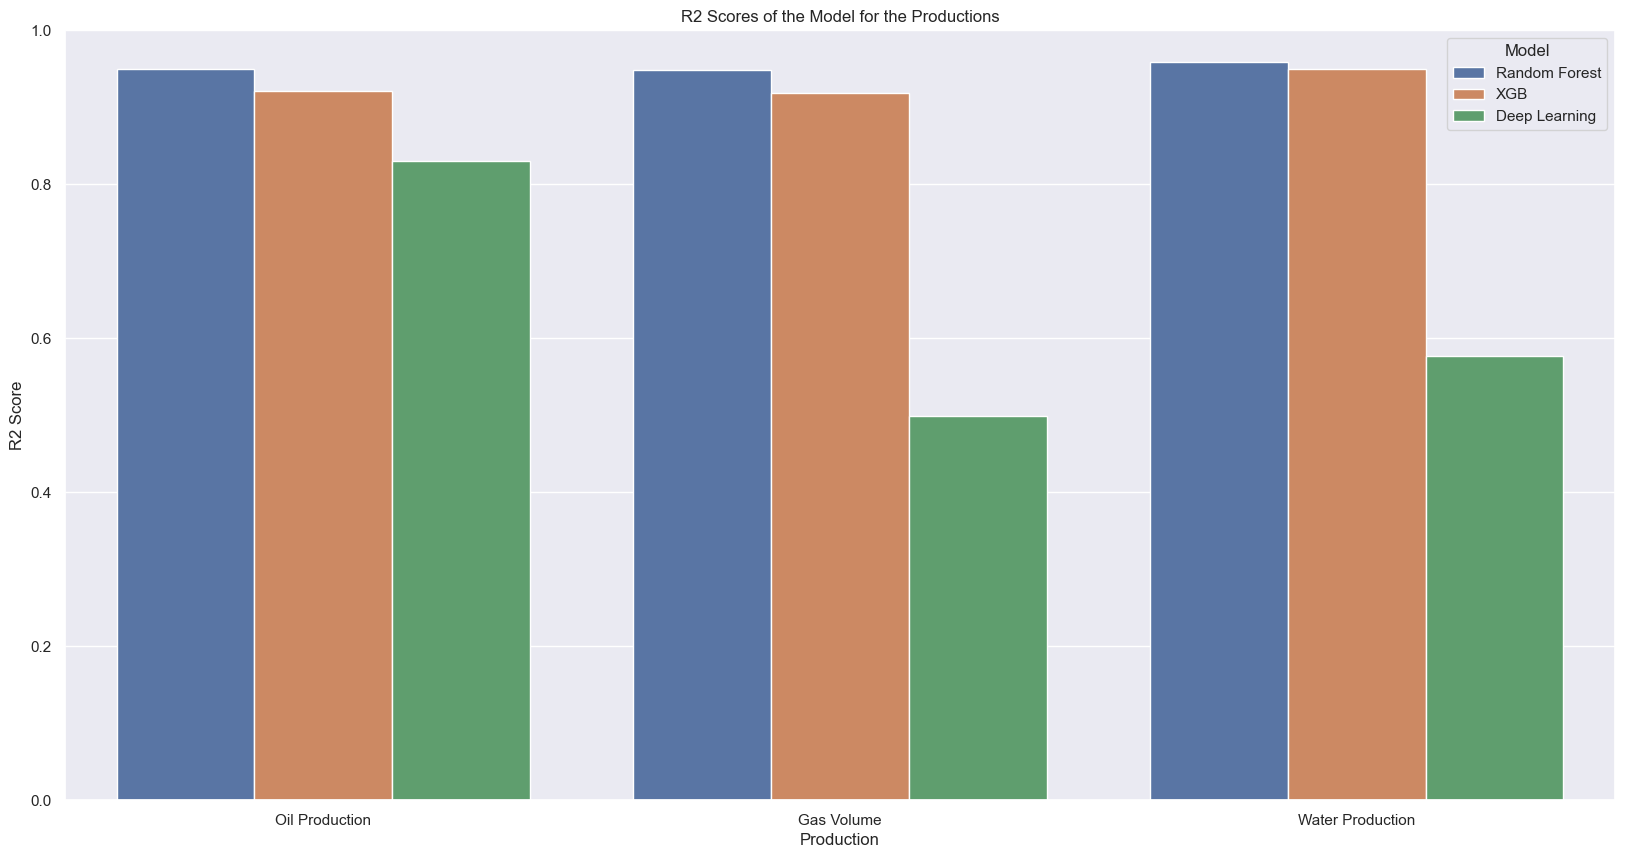

In [85]:
# Bar Plot of the metric scores
fig, axes = plt.subplots(1, figsize=(20, 10))
sns.set(style="darkgrid")
sns.barplot(y='R2_Score', x='Production', hue='Model', data=r2_results_df, orient='v')
plt.title('R2 Scores of the Model for the Productions')
axes.set_ylim([0, 1])
axes.set_ylabel('R2 Score')

### Predictions Remark

R2 score, mean absolute error, root mean square error were used as the perfomance metric for all the models except random forest with cross validation which only, root mean squared error and r2 score were used.
Random Forest has the best perfomance in  terms of the performance metrics used in this prediction analysis.
Therefore, random forest predictions were converted to a csv file as the predictions for the validation dataset.

Thank you for this opportunity